In [6]:
import requests
import json

url = 'https://raw.githubusercontent.com/bsbodden/redis_vss_getting_started/main/data/bikes.json'
response = requests.get(url)
bikes = json.loads(response.text)

In [2]:
%pip install -U -q sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('msmarco-distilbert-base-v4')

In [8]:
descriptions = [obj['description'] for obj in bikes]
descriptions

['Small and powerful, the Jigger is the best ride for the smallest of tikes! This is the tiniest kids’ pedal bike on the market available without a coaster brake, the Jigger is the vehicle of choice for the rare tenacious little rider raring to go. We say rare because this smokin’ little bike is not ideal for a nervous first-time rider, but it’s a true giddy up for a true speedster. The Jigger is a 12 inch lightweight kids bicycle and it will meet your little one’s need for speed. It’s a single speed bike that makes learning to pump pedals simple and intuitive. It even has  a handle in the bottom of the saddle so you can easily help your child during training!  The Jigger is among the most lightweight children’s bikes on the planet. It is designed so that 2-3 year-olds fit comfortably in a molded ride position that allows for efficient riding, balanced handling and agility. The Jigger’s frame design and gears work together so your buddingbiker can stand up out of the seat, stop rapidly

In [15]:
models = [obj['model'] for obj in bikes]
models

['Jigger',
 'Hillcraft',
 'Chook air 5',
 'Eva 291',
 'Kahuna',
 'XBN 2.1 Alloy',
 'WattBike',
 'Soothe Electric bike',
 'Secto',
 'Summit',
 'ThrillCycle']

In [17]:
queries = [
    'Bike for small kids',
    'Best Mountain bikes for kids',
    'Cheap Mountain bike for kids',
    'Female specific mountain bike',
    'Road bike for beginners',
    'Commuter bike for people over 60',
    'Comfortable commuter bike',
    'Good bike for college students',
    'Mountain bike for beginners',
    'Vintage bike',
    'Comfortable city bike'
]
encoded_queries = embedder.encode(queries)
len(encoded_queries)

11

In [10]:
import numpy as np
embeddings = embedder.encode(descriptions).astype(np.float32).tolist()

In [12]:
%pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 26.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 9.7 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.5 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [31]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

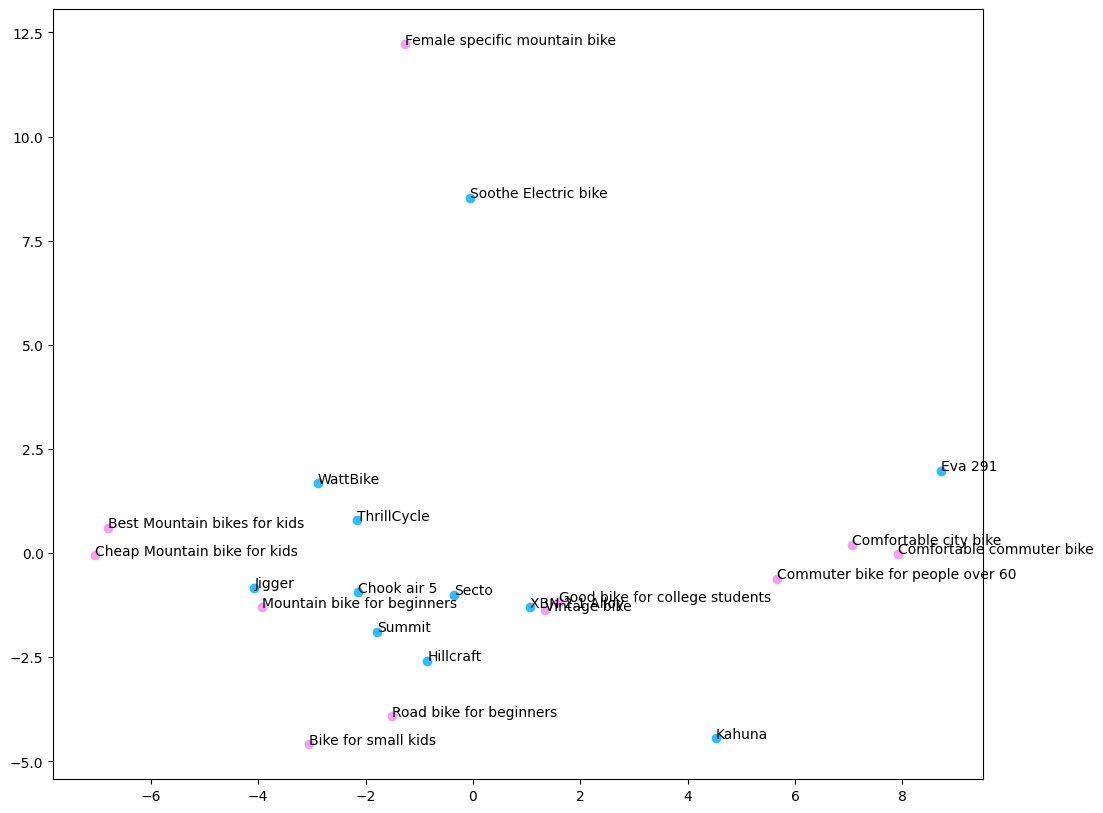

In [32]:
# Create a new figure with a specific size (in inches)
plt.figure(figsize=(12, 10))  # Default is usually (6, 4), so (9, 6) is 1.5 times larger

# Step 2: Apply PCA
pca = PCA(n_components=2)  # We are reducing to 2 dimensions
embeddings_pca = pca.fit_transform(embeddings)
encoded_queries_pca = pca.fit_transform(encoded_queries)

# Step 3: Visualize
plt.scatter(embeddings_pca[:,0], embeddings_pca[:,1])
for i, sentence in enumerate(models):
    plt.annotate(sentence, xy=(embeddings_pca[i,0], embeddings_pca[i,1]))

plt.scatter(encoded_queries_pca[:,0], encoded_queries_pca[:,1])
for i, sentence in enumerate(queries):
    plt.annotate(sentence, xy=(encoded_queries_pca[i,0], encoded_queries_pca[i,1]))

plt.show()

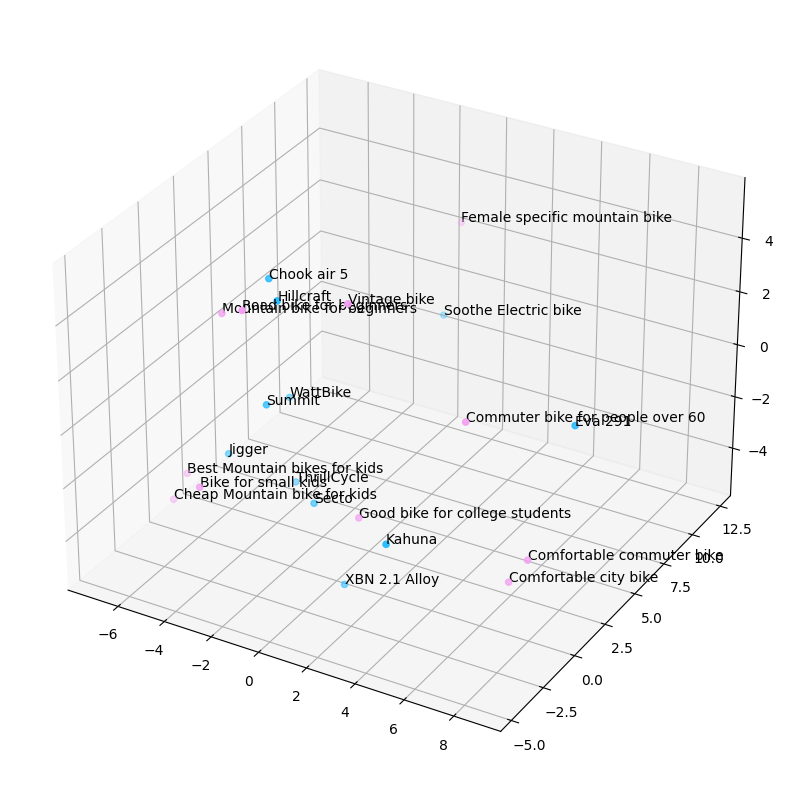

In [34]:
pca = PCA(n_components=3)
embeddings_pca = pca.fit_transform(embeddings)
encoded_queries_pca = pca.fit_transform(encoded_queries)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(embeddings_pca[:,0], embeddings_pca[:,1], embeddings_pca[:,2])
for i, sentence in enumerate(models):
    ax.text(embeddings_pca[i,0], embeddings_pca[i,1], embeddings_pca[i,2], sentence)

ax.scatter(encoded_queries_pca[:,0], encoded_queries_pca[:,1], encoded_queries_pca[:,2])
for i, sentence in enumerate(queries):
    ax.text(encoded_queries_pca[i,0], encoded_queries_pca[i,1], encoded_queries_pca[i,2], sentence)

plt.show()

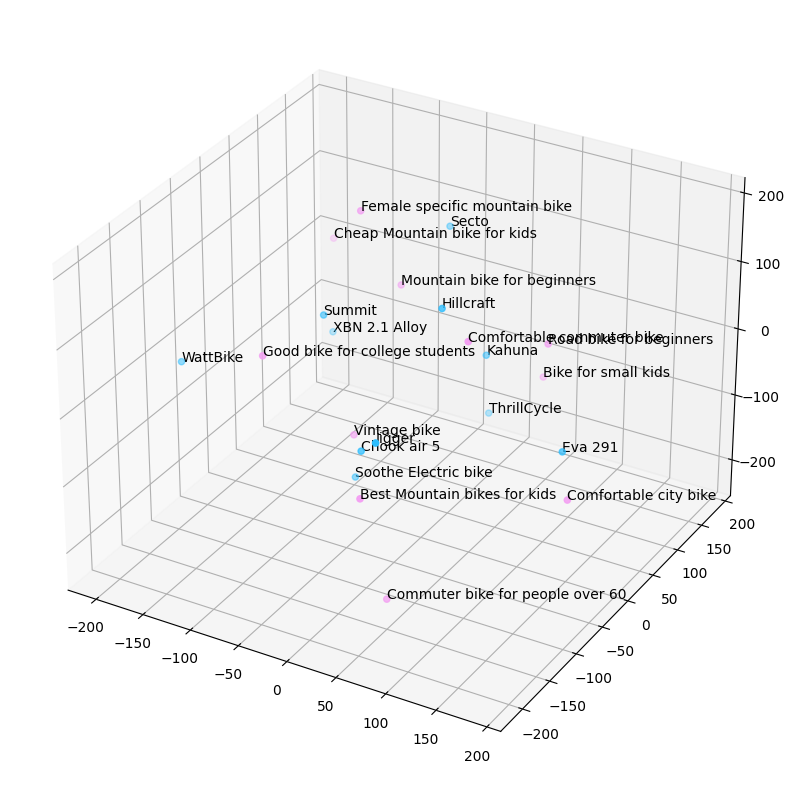

In [40]:
from sklearn.manifold import TSNE

# Calculate an appropriate perplexity value
perplexity_value = min(30, len(embeddings) - 1)  # Minus 1 to prevent the same number

tsne = TSNE(n_components=3, perplexity=perplexity_value)
embeddings_tsne = tsne.fit_transform(np.array(embeddings))
encoded_queries_tsne = tsne.fit_transform(np.array(encoded_queries))

# Visualize in 3D
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(embeddings_tsne[:,0], embeddings_tsne[:,1], embeddings_tsne[:,2])
for i, sentence in enumerate(models):
    ax.text(embeddings_tsne[i,0], embeddings_tsne[i,1], embeddings_tsne[i,2], sentence)

ax.scatter(encoded_queries_tsne[:,0], encoded_queries_tsne[:,1], encoded_queries_tsne[:,2])
for i, sentence in enumerate(queries):
    ax.text(encoded_queries_tsne[i,0], encoded_queries_tsne[i,1], encoded_queries_tsne[i,2], sentence)

plt.show()